# Image Processing with DNN

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
mnist=keras.datasets.mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
from matplotlib import pyplot as plt

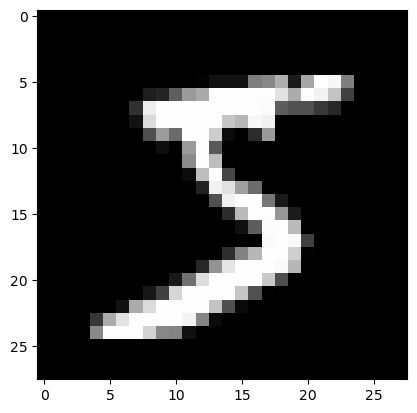

In [8]:
plt.imshow(train_images[0],cmap="gray");

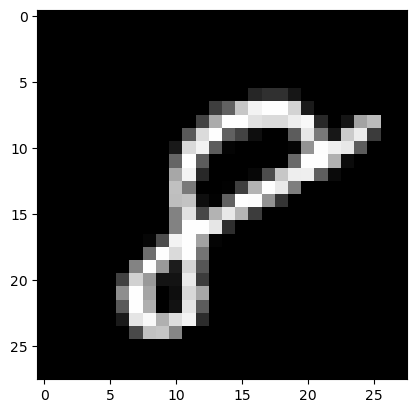

In [9]:
plt.imshow(train_images[59999],cmap="gray");

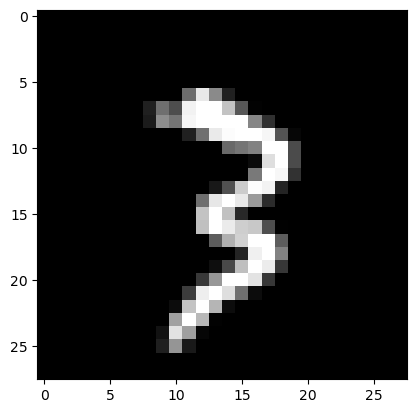

In [10]:
plt.imshow(train_images[25000],cmap="gray");

In [11]:
# Normalizing the data

In [12]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
# Since max val is 255, normalize with 255
train_images=train_images/255.0
test_images=test_images/255.0

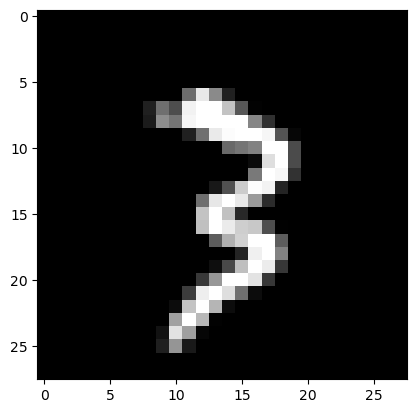

In [14]:
plt.imshow(train_images[25000],cmap="gray");

In [15]:
# no change after normalizing

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,InputLayer,Reshape
import tensorflow as tf

In [17]:
# CNN 

model=Sequential()
model.add(InputLayer(input_shape=(28,28))) # input layer
model.add(Reshape(target_shape=(28,28,1))) # grayscale channel (1)
model.add(Conv2D(filters=12,kernel_size=(3,3),activation="relu")) # CNN converts the 28x28 to 3x3 matrix
model.add(MaxPooling2D(pool_size=(2,2))) # 3x3 to 2x2 by using maxpooling (selects the max val from each grid)
model.add(Flatten()) # converts into a single row or column
model.add(Dense(10))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [18]:
history=model.fit(train_images,train_labels,batch_size=128,epochs=10,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.4309 - accuracy: 0.8881 - val_loss: 0.2068 - val_accuracy: 0.9419
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1791 - accuracy: 0.9495 - val_loss: 0.1419 - val_accuracy: 0.9599
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1313 - accuracy: 0.9634 - val_loss: 0.1097 - val_accuracy: 0.9668
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1067 - accuracy: 0.9704 - val_loss: 0.0919 - val_accuracy: 0.9745
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0913 - accuracy: 0.9747 - val_loss: 0.0792 - val_accuracy: 0.9757
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0799 - accuracy: 0.9779 - val_loss: 0.0791 - val_accuracy: 0.9762
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0715 - accuracy: 0.9796 - val_loss: 0.0680 - val_accuracy: 0.9787
Epoch 

In [19]:
scores=model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9793


In [20]:
# !pip install pydot

In [21]:
# !pip install graphviz

In [22]:
# from keras.utils.vis_utils import plot_model

In [23]:
# plot_model(model, to_file='model_plotCNN.png', show_shapes=True, show_layer_names=True)

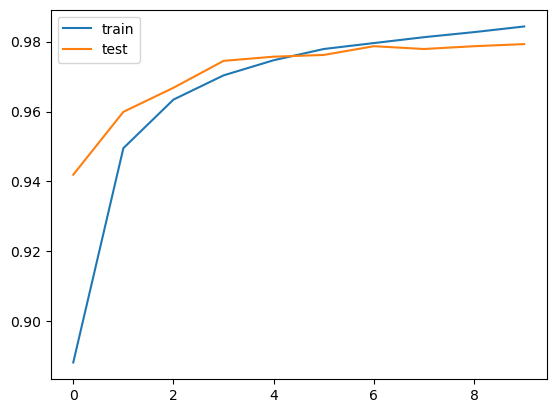

In [24]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.legend()

## Another Eg: Recognising Clothes

In [25]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [26]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

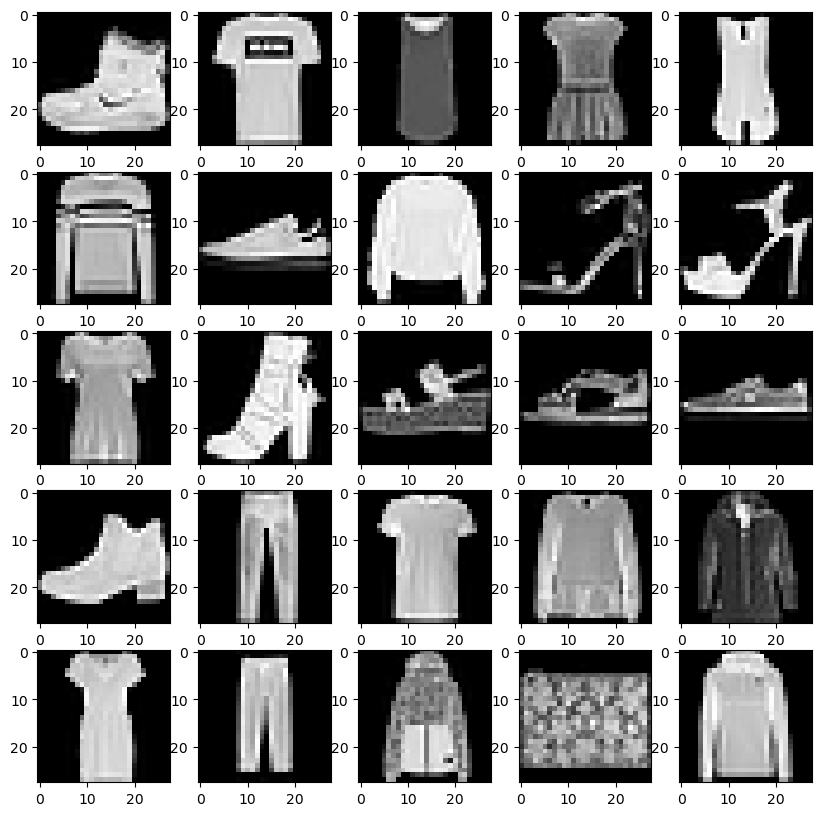

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap="gray")

In [28]:
train_images=train_images/255.0
test_images=test_images/255.0

In [29]:
# same as model.add but cleaner code
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

In [30]:
# input layer as flatten: for computer, images are just numbers. Flatten just converts the nxn matrix to a n^2 x 1 or 1 x n^2 row/column

In [31]:
model.fit(train_images,train_labels,epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4820 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3640 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3274 - accuracy: 0.8791
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3054 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2883 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2609 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2501 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2389 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.230

In [35]:
scores=model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.2961 - accuracy: 0.8963


### Using CNN

In [45]:
model=Sequential()
model.add(InputLayer(input_shape=(28,28))) #input layer
model.add(Reshape(target_shape=(28,28,1)))
model.add(Conv2D(filters=12,kernel_size=(3,3), activation='relu')) #CNN
model.add(MaxPooling2D(pool_size=(2,2)))   
model.add(Flatten())
model.add(Dense(10))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')

In [46]:
model.fit(train_images,train_labels,epochs=10,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4951 - accuracy: 0.8267 - val_loss: 0.4140 - val_accuracy: 0.8538
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3548 - accuracy: 0.8759 - val_loss: 0.3597 - val_accuracy: 0.8727
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3184 - accuracy: 0.8881 - val_loss: 0.3355 - val_accuracy: 0.8832
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2966 - accuracy: 0.8954 - val_loss: 0.3197 - val_accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.8998 - val_loss: 0.3007 - val_accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2692 - accuracy: 0.9045 - val_loss: 0.2951 - val_accuracy: 0.8937
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2575 - accuracy: 0.9079 - val_loss: 0.2946 - val_accuracy:

In [47]:
scores=model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8988
